In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_colesterol = pd.read_csv('./dataset/dataset_colesterol.csv')
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Remover coluna ID
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
# Renomear colunas para facilitar a análise
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [6]:
# Copiar DF para DF específico para EDA
df_colesteral_eda = df_colesterol.copy()

In [7]:
# Copiar DF para DF específico para Bucketing
df_colesteral_bucketing = df_colesterol.copy()

### Análise Exploratória dos Dados

In [8]:
df_colesteral_eda.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [9]:
print(df_colesteral_eda.grupo_sanguineo.unique())
print(df_colesteral_eda.fumante.unique())
print(df_colesteral_eda.nivel_atividade_fisica.unique())

['B' 'A' 'O' 'AB' nan]
['Sim' 'Não' nan]
['Baixo' 'Moderado' 'Alto' nan]


In [10]:
# Detectar valores ausentes
df_colesteral_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [11]:
# Analisar as medidas estatísticas do DF (variáveis numéricas)
df_colesteral_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [12]:
# Coletar medidas das variáveis categóricas --> Nesse caso a moda para variáveis categóricas
moda_grupo_sanguineo = df_colesteral_eda.grupo_sanguineo.mode()
moda_fumante = df_colesteral_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesteral_eda.nivel_atividade_fisica.mode()

In [13]:
# Coletar as medianas para as variáveis numéricas
mediana_idade = df_colesteral_eda.idade.median()
mediana_peso = df_colesteral_eda.peso.median()
mediana_altura = df_colesteral_eda.altura.median()

In [14]:
# Inputar valores ausentes
df_colesteral_eda.fillna(value={'grupo_sanguineo': moda_grupo_sanguineo[0], 
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade_fisica[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura
                                }, inplace=True)

In [15]:
# Mudar tipo da variável -> float para inteiro -> colunas: idade e altura

df_colesteral_eda.idade = df_colesteral_eda.idade.astype(int)
df_colesteral_eda.altura = df_colesteral_eda.altura.astype(int)

In [16]:
# Estrutura do dataframe
df_colesteral_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [17]:
df_colesteral_eda.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23


<Axes: xlabel='idade'>

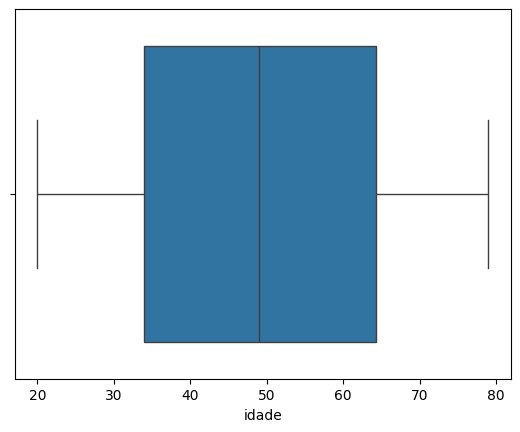

In [18]:
# Tratamento de Outliers - Verificando Idade
sns.boxplot(data=df_colesteral_eda, x='idade')

<Axes: xlabel='peso'>

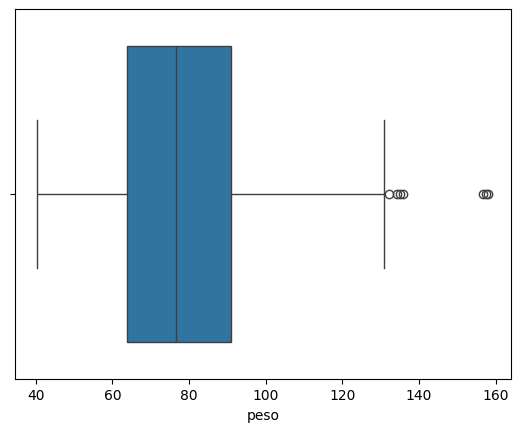

In [26]:
# Tratamento de Outliers - Verificando Peso
sns.boxplot(data=df_colesteral_eda, x='peso')

In [21]:
# Remover outliers cujo peso é muito baixo
# Filtrar o público a ser removido => peso < 40kg
df_colesteral_eda[df_colesteral_eda['peso'] <  40].peso.count()

np.int64(37)

In [24]:
# Remover publico do Dataframe
df_colesteral_eda.drop(df_colesteral_eda[df_colesteral_eda['peso'] <  40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

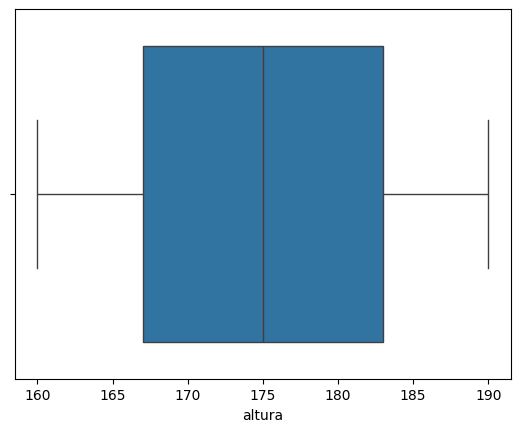

In [ ]:
# Tratamento de Outliers - Verificando Altura
sns.boxplot(data=df_colesteral_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

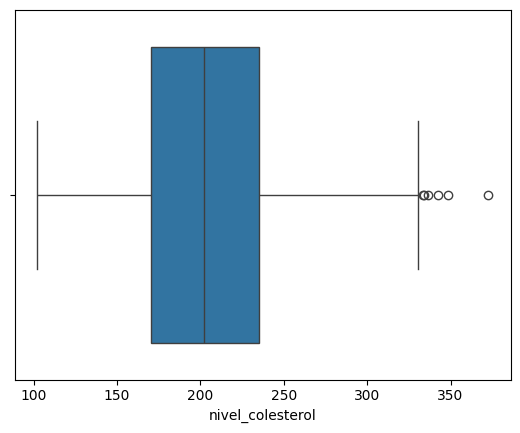

In [28]:
# Tratamento de Outliers - Verificando Nivel colesterol
sns.boxplot(data=df_colesteral_eda, x='nivel_colesterol')